In [135]:
import numpy as np 
import matplotlib.pyplot as plt
import librosa
import librosa.display as ld

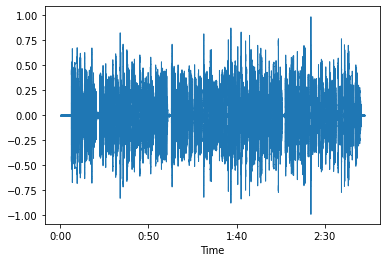

In [136]:
x,sr=librosa.load("../../AEC/dataset_daps/daps/cleanraw/f10_script1_cleanraw.wav",sr=48000)
ld.waveshow(x,sr=sr)

In [137]:
N=128
R=N//2
mfccs=librosa.feature.mfcc(y=x,sr=sr,n_mfcc=64,n_fft=N,hop_length=R)
print(mfccs.shape)
mfccs=mfccs.T

/home/prasad/anaconda3/envs/aec/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


(64, 129406)


In [138]:
noise_mfcc=np.zeros(64)
m=x.shape[0]
n=((m//R)+1)*R
flag=np.zeros(n)
alpha=0.8
scale=2
initial=(200*sr//(R*1000))
print(initial)
for i in range(0,mfccs.shape[0]):
    #print(mfccs[i,:].shape)
    if(i<2):
        #get the noise template in the first 25 ms
        noise_mfcc+=mfccs[i]/2
        threshold=np.mean(noise_mfcc**2)
    else:
        dth=np.linalg.norm(mfccs[i]-noise_mfcc)**2
        if(dth>scale*threshold):
            flag[i*R:i*R+R]=np.ones(R)
        else:
            flag[i*R:i*R+R]=np.zeros(R)
            threshold=threshold*alpha+(1-alpha)*dth
        

150


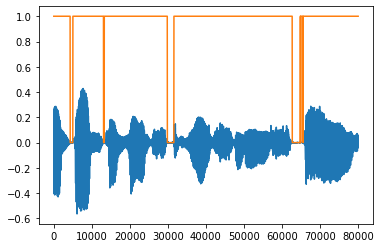

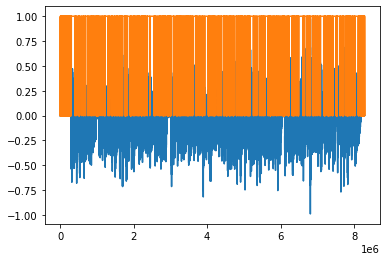

In [139]:
plt.figure()
offset=2000000
plt.plot(x[offset:offset+80000])
plt.plot(flag[offset:offset+80000])

plt.figure()
plt.plot(x)
plt.plot(flag)